# Demo for COCO dataset on PyTorch

Step 1: Import packages.

In [1]:
%matplotlib inline

import torch
import torchvision.transforms as transforms
import torch.utils.data as data
import os
import pickle
import numpy as np
import nltk
from PIL import Image
from build_vocab import Vocabulary
from pycocotools.coco import COCO

from dataloader_pytorch import get_loader

import matplotlib.pyplot as plt

Step 2: Define constants.

In [2]:
image_dir = 'data/resized2014'
caption_path = 'data/annotations/captions_train2014.json'
batch_size = 128
vocab_path = 'data/vocab.pkl'
num_workers = 2
crop_size = 224

Step 3: get loader

In [3]:
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

dataloader = get_loader(image_dir, caption_path, vocab, 
                        batch_size,
                        crop_size,
                        shuffle=True, num_workers=num_workers) 

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


Step 4: Test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 224, 224])
[28, 21, 19, 19, 18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10]

First image:


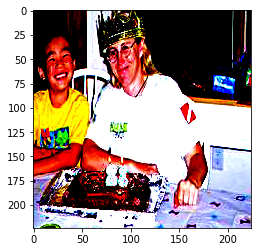

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<sos> a woman wearing a crown sits next to a boy in a yellow shirt and a cake is on a table in front of them . <eos>
<sos> a woman wearing a crown sits next to a boy in a yellow shirt and a cake is on a table in front of them .

Second image:


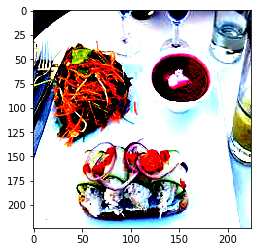

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<sos> a white plate topped with an open face sandwich and a salad next to a bowl of soup . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<sos> a white plate topped with an open face sandwich and a salad next to a bowl of soup .

The last image:


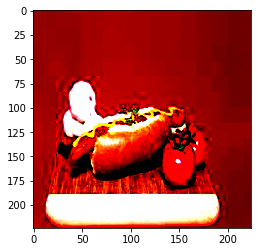

<sos> a hotdog and some tomatoes on a board <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<sos> a hotdog and some tomatoes on a board


In [4]:
def translate_with_eos(indices):
    return ' '.join([vocab.idx2word[int(index.numpy())] for index in indices])
def translate(indices):
    sentences = list()
    for index in indices:
        word = vocab.idx2word[int(index)]
        if word == '<eos>':
            break
        sentences.append(word)
    return ' '.join(sentences)

def imshow(img):
    plt.figure()
    plt.imshow(img)
    plt.show()
for imgs, captions, lengths in dataloader:
    print(imgs.shape)
    print(lengths)
    
    print()
    print('First image:')
    imshow(imgs[0].numpy().transpose(1, 2, 0))
    print(translate_with_eos(captions[0]))
    print(translate(captions[0]))
    
    print()
    print('Second image:')
    imshow(imgs[1].numpy().transpose(1, 2, 0))
    print(translate_with_eos(captions[1]))
    print(translate(captions[1]))

    print()
    print('The last image:')
    imshow(imgs[-1].numpy().transpose(1, 2, 0))
    print(translate_with_eos(captions[-1]))
    print(translate(captions[-1]))
    break